In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statistics
import seaborn as sb

In [2]:
petr3_df = pd.read_csv("arquivos/Acoes/PETR3.csv")    

In [3]:
pd.DataFrame(petr3_df)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var(%)
0,01.March.2024,37.36,41.38,41.86,35.50,13.95M,-9.36
1,01.February.2024,41.22,42.60,44.50,40.74,216.23M,-2.23
2,01.January.2024,42.16,39.00,42.93,38.59,204.82M,8.16
3,01.December.2023,38.98,37.60,39.33,35.06,178.38M,3.40
4,01.November.2023,37.70,36.68,38.51,35.22,239.96M,-0.37
...,...,...,...,...,...,...,...
79,01.August.2017,5.78,5.68,6.06,5.53,180.60M,1.23
80,01.July.2017,5.71,5.48,5.77,5.16,123.75M,4.55
81,01.June.2017,5.46,5.72,5.86,5.24,179.96M,-3.08
82,01.May.2017,5.64,5.96,6.77,5.34,251.19M,-5.15


In [4]:
print(f"Média = {petr3_df['Máxima'].mean()}")
print(f"Mediana = {petr3_df['Máxima'].median()}")
print(f"Máximo = {petr3_df['Máxima'].max()}")
print(f"Mínima = {petr3_df['Máxima'].min()}")
print(f"Variância = {petr3_df['Máxima'].var()}") 
print(f"Desvio Padrão = {petr3_df['Máxima'].std()}") 

Média = 17.379285714285714
Mediana = 13.48
Máximo = 44.5
Mínima = 5.77
Variância = 104.52983080895008
Desvio Padrão = 10.223983118577127


In [5]:
print(f"Média = {petr3_df['Mínima'].mean()}")
print(f"Mediana = {petr3_df['Mínima'].median()}")
print(f"Máximo = {petr3_df['Mínima'].max()}")
print(f"Mínima = {petr3_df['Mínima'].min()}")
print(f"Variância = {petr3_df['Mínima'].var()}") 
print(f"Desvio Padrão = {petr3_df['Mínima'].std()}") 

Média = 14.68797619047619
Mediana = 11.67
Máximo = 40.74
Mínima = 4.46
Variância = 80.64133681870341
Desvio Padrão = 8.980052161246247


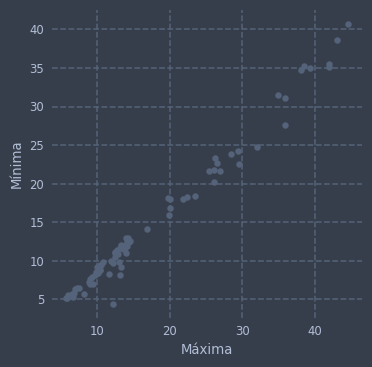

In [6]:
dispersao = petr3_df.plot.scatter(x='Máxima', y='Mínima')

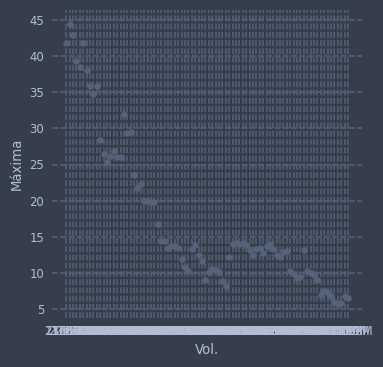

In [7]:
dispersao = petr3_df.plot.scatter(x='Vol.', y='Máxima')

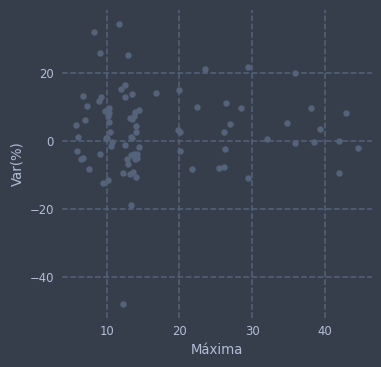

In [8]:
dispersao = petr3_df.plot.scatter(x='Máxima', y='Var(%)')

In [9]:
petr3_df.sort_values(by="Var(%)", ascending=True)[["Data", "Var(%)"]] 

,Data,Var(%)
48,01.March.2020,-47.92
37,01.February.2021,-18.95
69,01.June.2018,-12.48
42,01.September.2020,-11.42
18,01.September.2022,-11.00
...,...,...
19,01.August.2022,21.58
65,01.October.2018,25.13
74,01.January.2018,25.96
47,01.April.2020,31.90


In [10]:
petr3_df.sort_values(by="Var(%)", ascending=True)[["Data", "Máxima"]]

,Data,Máxima
48,01.March.2020,12.26
37,01.February.2021,13.28
69,01.June.2018,9.48
42,01.September.2020,10.17
18,01.September.2022,29.43
...,...,...
19,01.August.2022,29.47
65,01.October.2018,12.99
74,01.January.2018,9.08
47,01.April.2020,8.20


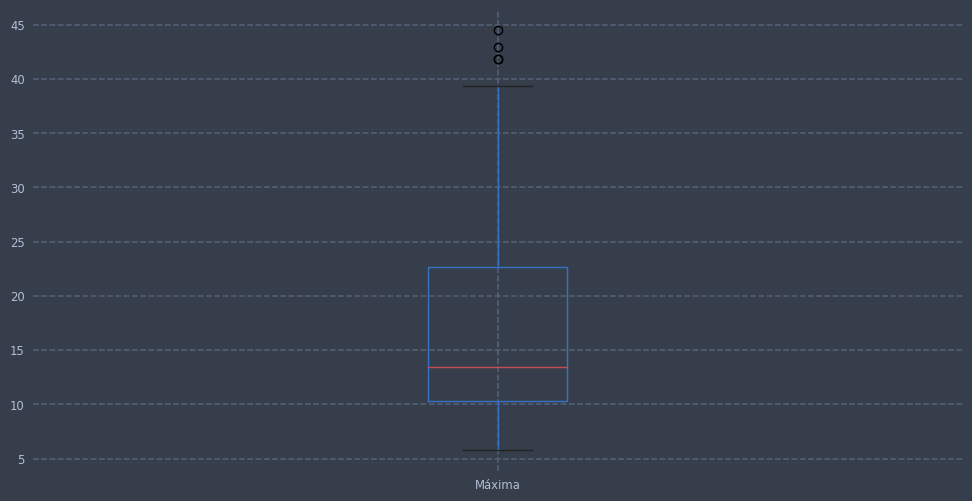

In [11]:
ax = petr3_df.boxplot(column = "Máxima", figsize = (12,6))

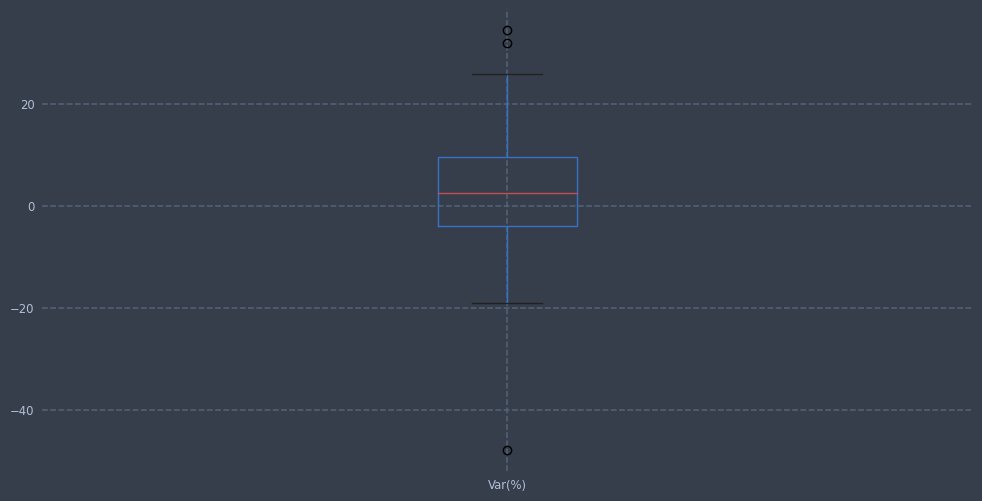

In [12]:
ax = petr3_df.boxplot(column = "Var(%)", figsize = (12,6))

In [4]:
#Lendo os dados da base
dataIdh = pd.read_csv("arquivos/IDH/idh.csv")

#Printando informações dos dados (Variancia, média, quartis, etc...)
print(f"var      {dataIdh['idh'].var():.6f}")
print(dataIdh["idh"].describe())

var      0.000023
count    5.000000
mean     0.760200
std      0.004817
min      0.754000
25%      0.758000
50%      0.759000
75%      0.764000
max      0.766000
Name: idh, dtype: float64


Text(0.5, 1.0, 'IDH brasileiro de 2017 a 2021')

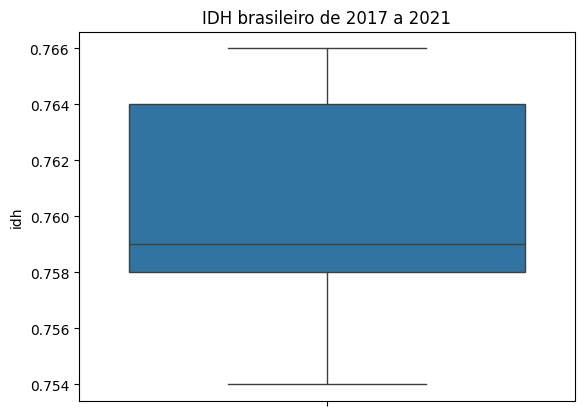

In [45]:
#Boxplot dos dados de referentes a IDH de 2017 a 2021
sb.boxplot(dataIdh, y='idh').set_title("IDH brasileiro de 2017 a 2021")

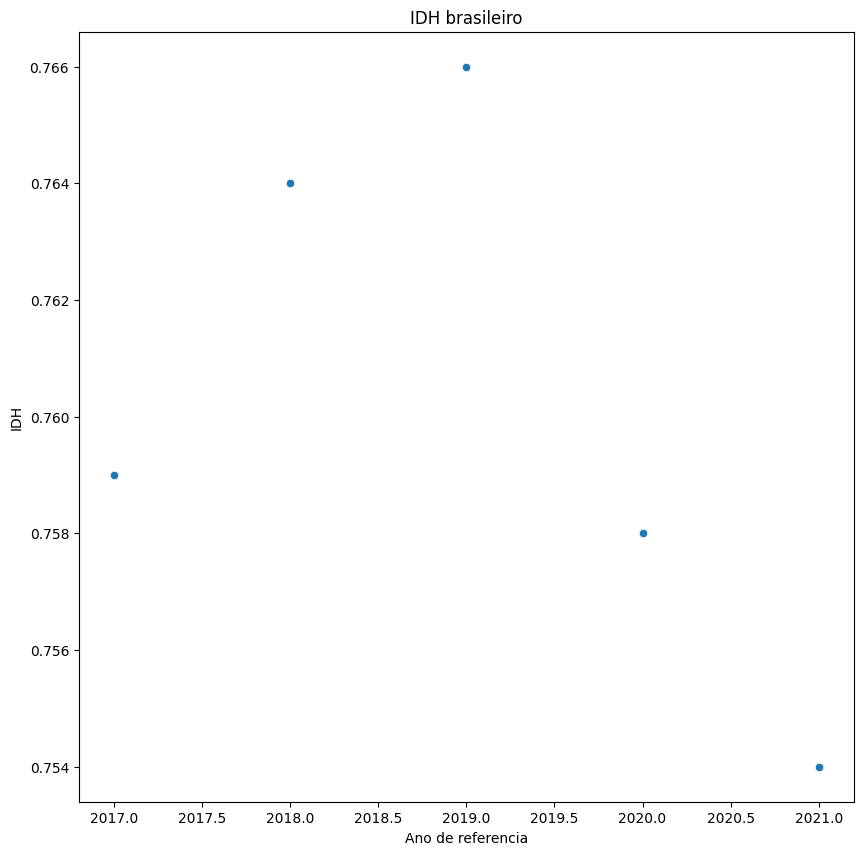

In [5]:
#Definindo tamanho da imagem do gráfico
plt.figure(figsize=(10,10))

#Criando gráfico de disperção com base nos anos e valores de idh
dispersaoIdh = sb.scatterplot(data=dataIdh, x='ano_referencia', y='idh')

#Definindo valores do eixo x como múltiplos de 1 (Sem valores quebrados)
dispersaoIdh.xaxis.set_major_locator(ticker.MultipleLocator(1))

#Definindo títulos do gráfico
dispersaoIdh.set_title("IDH brasileiro")
dispersaoIdh.set_ylabel("IDH")
dispersaoIdh.set_xlabel("Ano de referencia")

#Exibindo o gráfico
plt.show()

Text(0.5, 1.0, 'IDH brasileiro de 2017 a 2021')

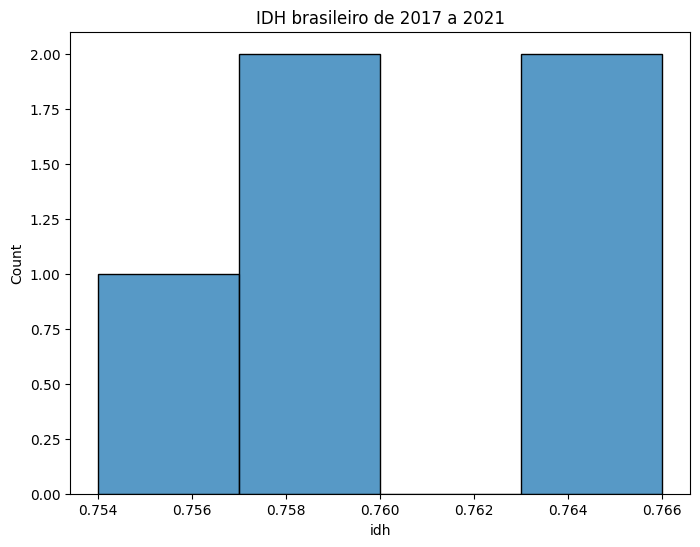

In [55]:
#Definindo tamanho da imagem do gráfico
plt.figure(figsize=(8,6))

#Histograma dados dados de IDH entre 2017 e 2021
sb.histplot(dataIdh, x='idh').set_title("IDH brasileiro de 2017 a 2021")

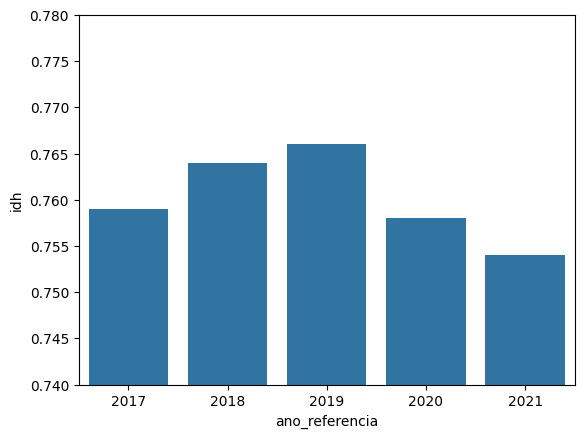

In [27]:
#Criando gráfico de barras com os dados de IDH ao longo dos anos
idhBar = sb.barplot(data=dataIdh, x='ano_referencia', y='idh')

#Definindo intervalo de valores do eixo y mostrado no gráfico
eixo = plt.gca()
eixo.set_ylim([0.74, 0.78])

#Exibindo o gráfico
plt.show()

In [7]:
#Lendo os dados da base
dataIdhReg = pd.read_csv("arquivos/IDH/GDL-Subnational-HDI-data.csv")

#Separando os dados referentes ao Brasil
dataIdhReg = dataIdhReg.loc[dataIdhReg['Country'] == 'Brazil']

#Separando os dados de acordo com o intervalo de tempo que será analisado
dataIdhReg = dataIdhReg[['Region', '2017', '2018', '2019', '2020', '2021']]

#Removendo linha irrelevante
dataIdhReg = dataIdhReg.drop(209)

#Printando informações dos dados (Variancia, média, quartis, etc...) de acordo com as colunas (Anos referencia)
for cln in dataIdhReg:
    if cln == 'Region': continue
    print(f'Var       {dataIdhReg[cln].var():.6f}')
    print(dataIdhReg[cln].describe())
    print()

Var       0.000725
count    27.000000
mean      0.749000
std       0.026932
min       0.703000
25%       0.732500
50%       0.748000
75%       0.764000
max       0.821000
Name: 2017, dtype: float64

Var       0.000730
count    27.000000
mean      0.753963
std       0.027016
min       0.708000
25%       0.737500
50%       0.753000
75%       0.769000
max       0.826000
Name: 2018, dtype: float64

Var       0.000748
count    27.000000
mean      0.756074
std       0.027357
min       0.709000
25%       0.739500
50%       0.755000
75%       0.771000
max       0.829000
Name: 2019, dtype: float64

Var       0.000731
count    27.000000
mean      0.747889
std       0.027040
min       0.702000
25%       0.731500
50%       0.746000
75%       0.763000
max       0.820000
Name: 2020, dtype: float64

Var       0.000724
count    27.000000
mean      0.744074
std       0.026899
min       0.698000
25%       0.727500
50%       0.743000
75%       0.759000
max       0.816000
Name: 2021, dtype: float64



Text(0.5, 1.0, 'IDH dos estados ao longo dos anos')

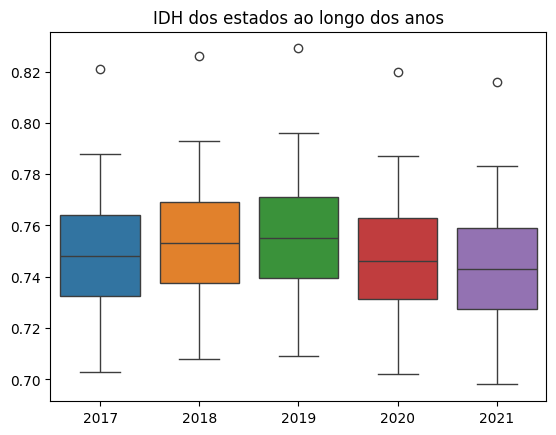

In [84]:
#Boxplot dos dados de IDH ao longo dos anos
sb.boxplot(data=dataIdhReg).set_title('IDH dos estados ao longo dos anos')

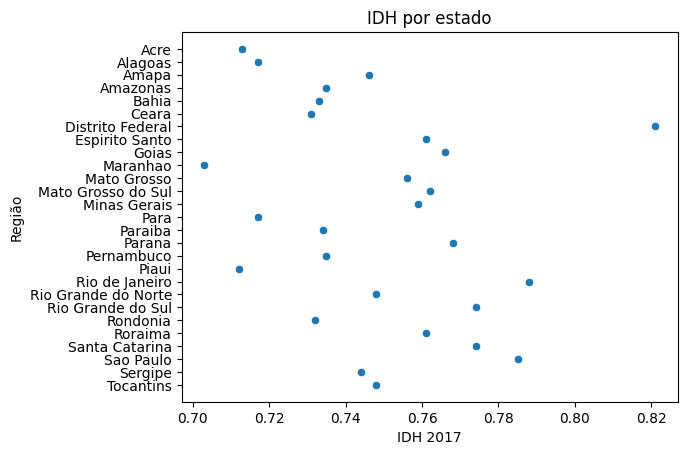

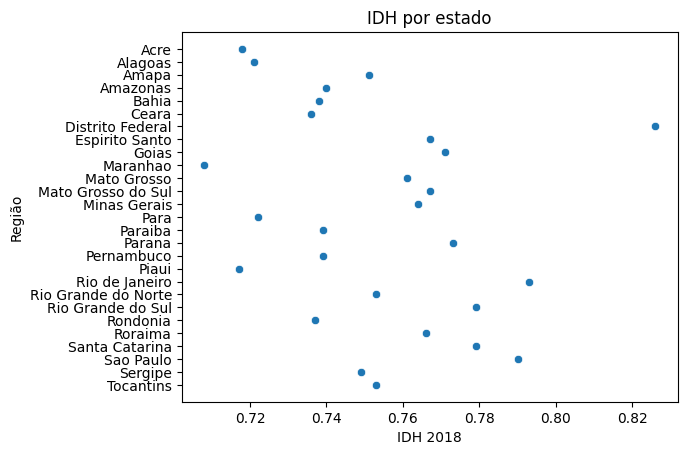

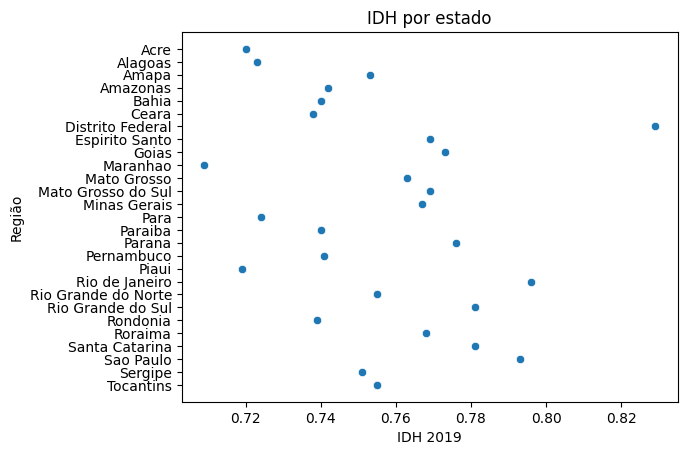

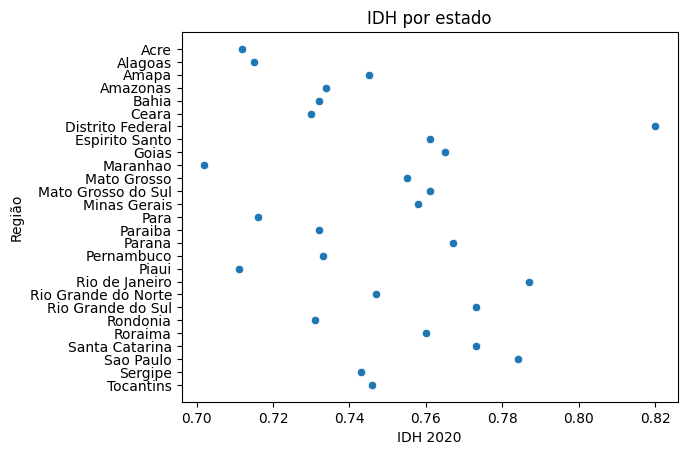

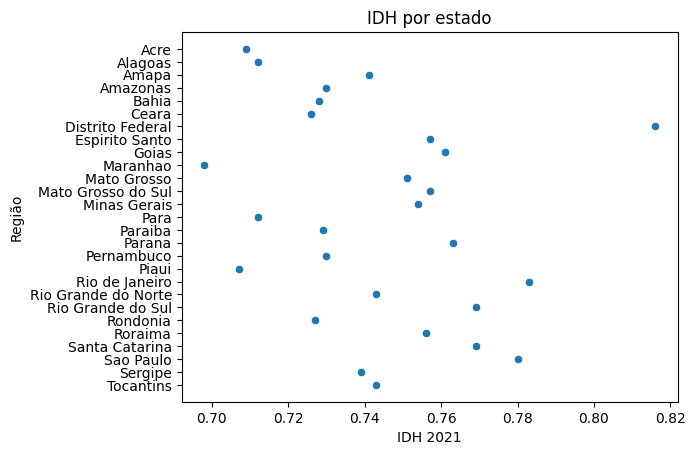

In [85]:
#Plotando gráficos de disperção dos dados de IDH dos estados brasileiros a cada ano entre 2017 e 2021
for cln in dataIdhReg:
    if cln == "Region": continue
    dispersaoIdh = sb.scatterplot(data=dataIdhReg, x=cln, y='Region')
    dispersaoIdh.set_title('IDH por estado')
    dispersaoIdh.set_xlabel(f'IDH {cln}')
    dispersaoIdh.set_ylabel('Região')
    plt.show()

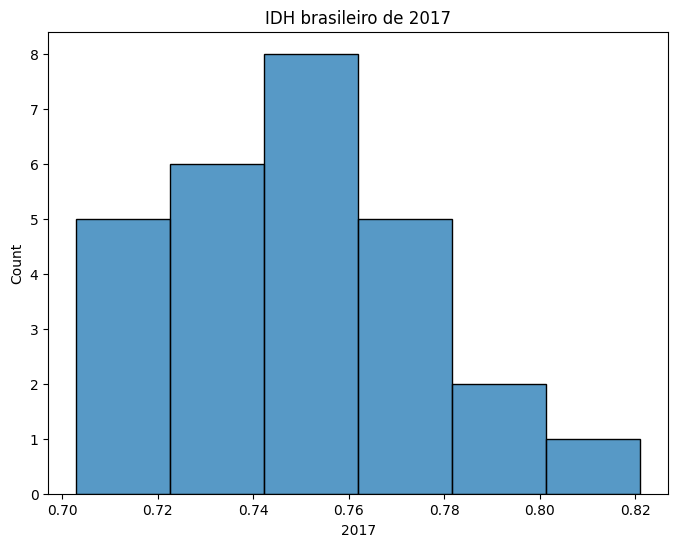

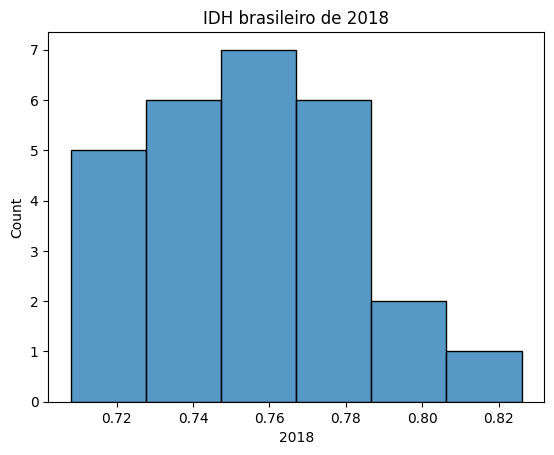

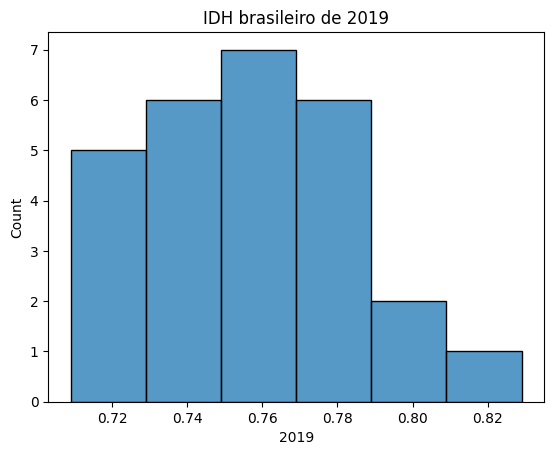

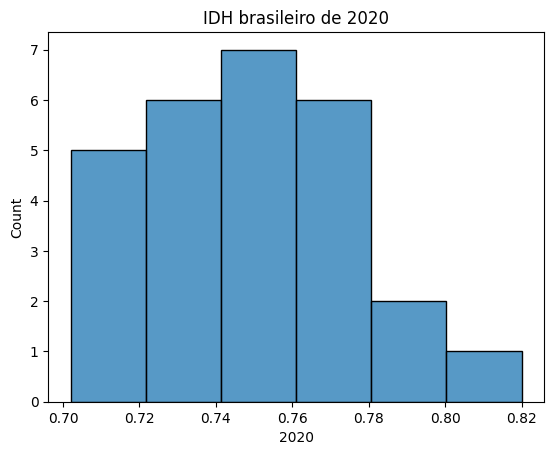

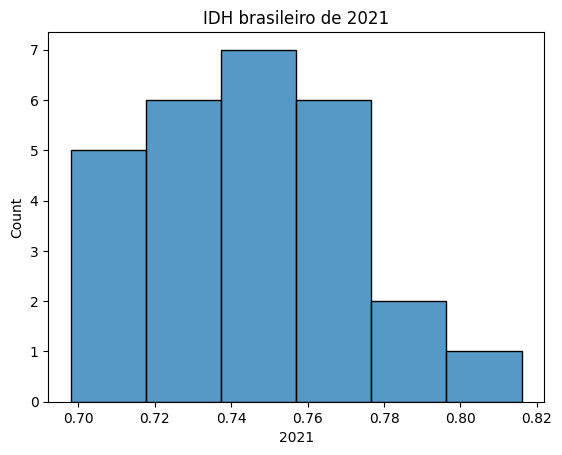

In [62]:
#Definindo novamente o tamanho da imagem do gráfico
plt.figure(figsize=(8,6))

#Plotando histogramas dos dados de IDH dos estados brasileiros entre 2017 e 2021
for cln in dataIdhReg:
    if cln == "Region": continue
    histIdh = sb.histplot(dataIdhReg, x=cln).set_title(f"IDH brasileiro de {cln}")
    plt.show()

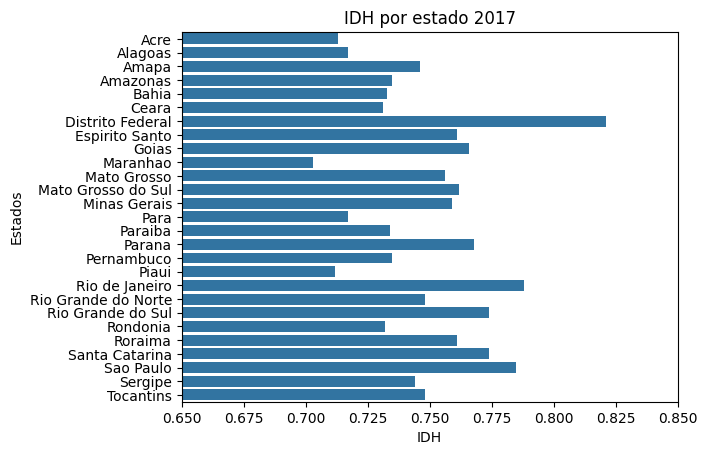

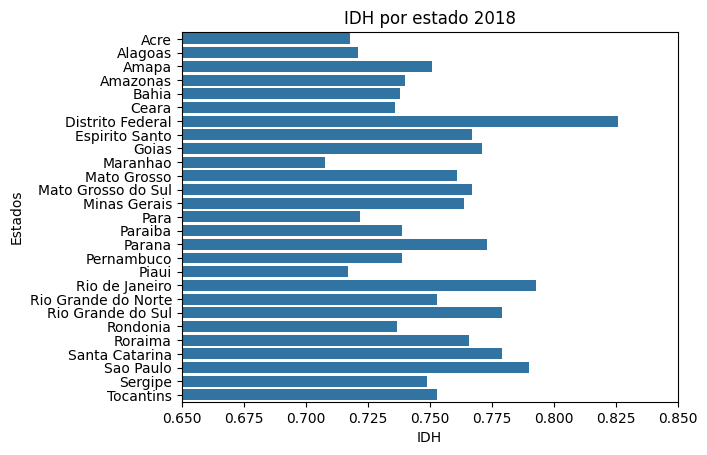

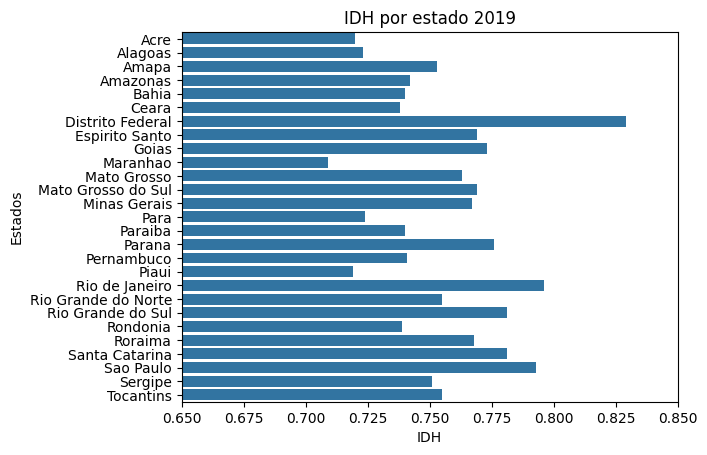

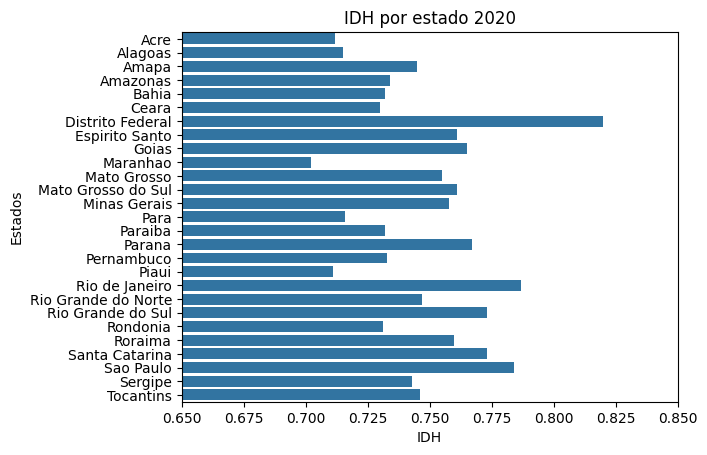

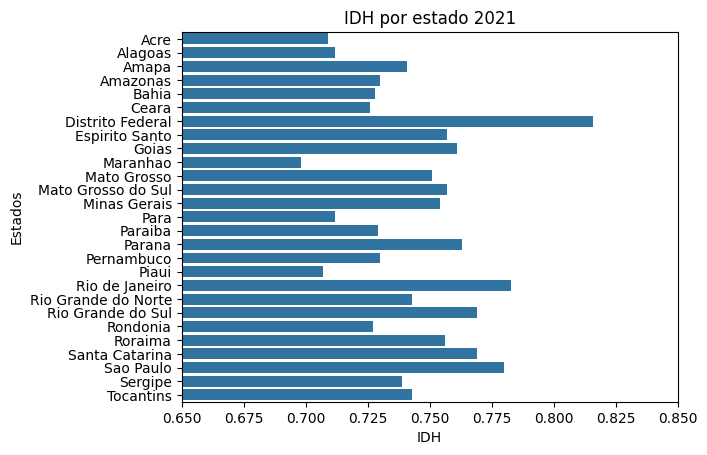

In [9]:
#Plotando gráficos de barra dos dados de IDH dos estados brasileiros entre 2017 e 2021
for cln in dataIdhReg:
    if cln == "Region": continue
    dispersaoIdh = sb.barplot(data=dataIdhReg, x=cln, y='Region')
    dispersaoIdh.set_title(f'IDH por estado {cln}')
    dispersaoIdh.set_xlabel('IDH')
    dispersaoIdh.set_ylabel('Estados')

    #Definindo intervalo de valores do eixo x a ser exibido no gráfico
    eixo = plt.gca()
    eixo.set_xlim([0.65, 0.85])

    #Exibindo gráfico
    plt.show()

In [10]:
#Criando dataframe pra receber dados do ipca de cada mes dos anos de 2017 a 2021
dataIpcaMedio = pd.DataFrame(columns=["Mes", "2017", "2018", "2019", "2020", "2021"])

#criando tupla com todos os meses do ano
meses = ("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro",
         "Novembro", "Dezembro")

#atribuindo os meses do ano à coluna "Mes"
for mes in meses:
    dataIpcaMedio = dataIpcaMedio._append({"Mes": mes}, ignore_index=True)

#For's para percorrer os arquivos com os dados
for j in range(17, 22): #For para os dados dos anos 2017 a 2021

    for i in range(1, 13): #For para os dados do mes de Janeiro a Dezembro

        if i < 10: #if para evitar erro no caminho até o arquivo
            dataIpca = pd.read_csv(f"arquivos/IPCA/ipca_20{j}/ipca_20{j}0{i}Subitem.csv")
        else:
            dataIpca = pd.read_csv(f"arquivos/IPCA/ipca_20{j}/ipca_20{j}{i}Subitem.csv")
        
        #Atribuição dos dados ao dataframe
        dataIpcaMedio.loc[i-1, f"20{j}"] = dataIpca["NACIONAL"].loc[0]

#Printando informações dos dados (Variancia, média, quartis, etc...) de acordo com as colunas (Anos referencia)
for cln in dataIpcaMedio:
    if cln == 'Mes': continue
    print(f'Var       {dataIpcaMedio[cln].var():.6f}')
    print(dataIpcaMedio[cln].describe())
    print()

Var       0.031493
count     12.00
unique    12.00
top        0.38
freq       1.00
Name: 2017, dtype: float64

Var       0.133857
count     12.00
unique    12.00
top        0.29
freq       1.00
Name: 2018, dtype: float64

Var       0.122093
count     12.00
unique    12.00
top        0.32
freq       1.00
Name: 2019, dtype: float64

Var       0.247982
count     12.00
unique    12.00
top        0.21
freq       1.00
Name: 2020, dtype: float64

Var       0.093348
count     12.00
unique    12.00
top        0.25
freq       1.00
Name: 2021, dtype: float64



Text(0.5, 1.0, 'IPCA ao longo dos anos')

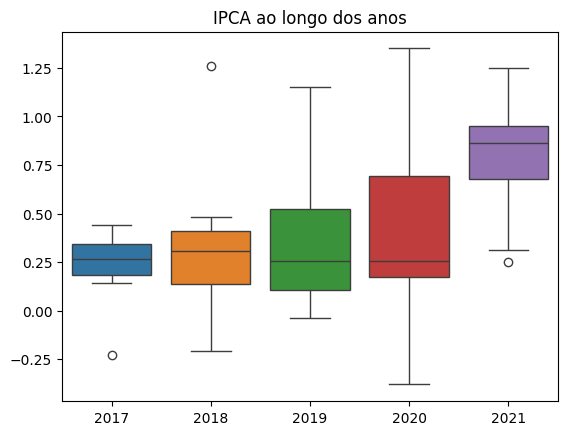

In [29]:
#Boxplot dos dados de IPCA ao longo dos anos de 2017 a 2021
sb.boxplot(data=dataIpcaMedio).set_title('IPCA ao longo dos anos')

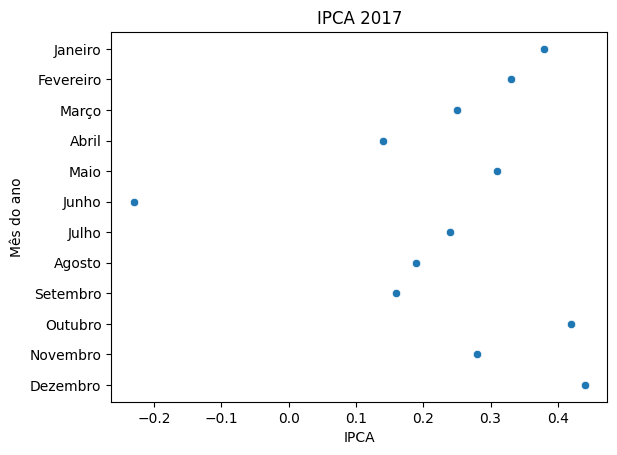

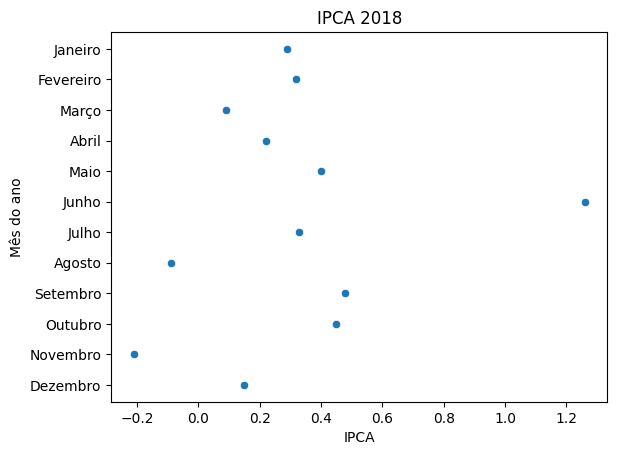

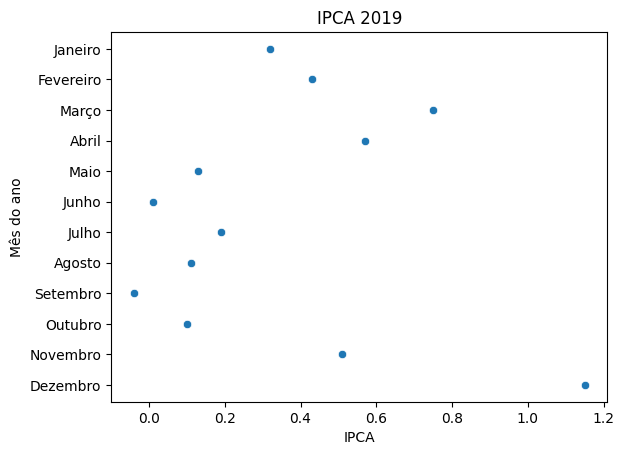

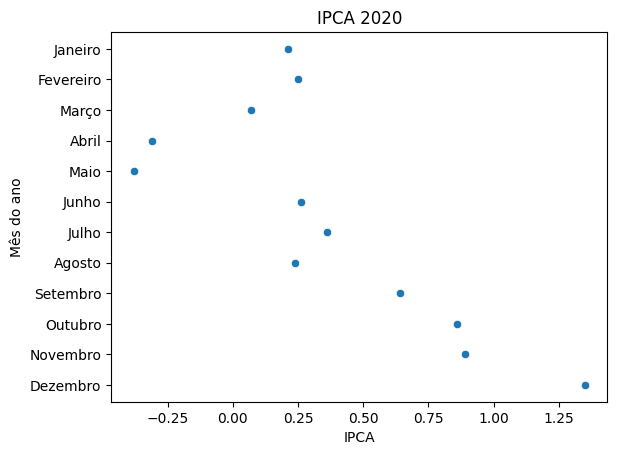

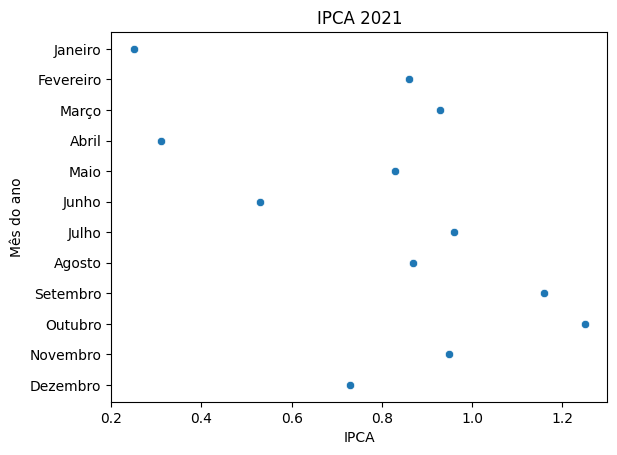

In [30]:
#Gráficos de disperção dos dados de IPCA por mes de cada ano entre 2017 e 2021
for cln in dataIpcaMedio:
    if cln == "Mes": continue
    dispersaoIpca = sb.scatterplot(data=dataIpcaMedio, x=cln, y='Mes')
    dispersaoIpca.set_title(f'IPCA {cln}')
    dispersaoIpca.set_xlabel("IPCA")
    dispersaoIpca.set_ylabel('Mês do ano')
    plt.show()

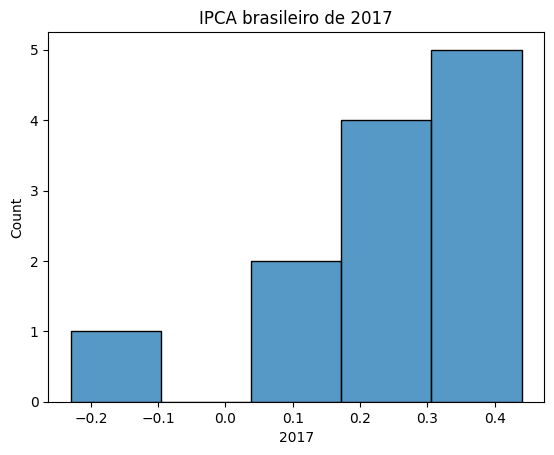

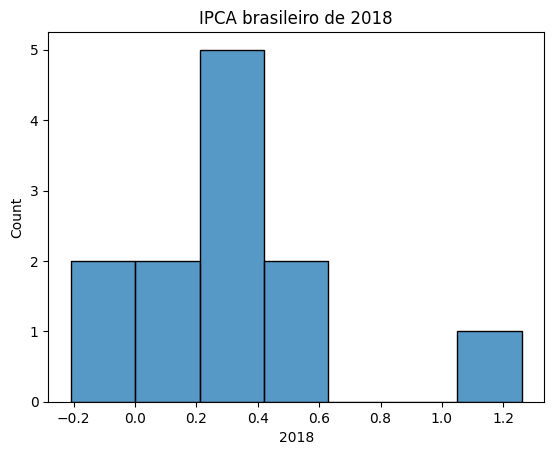

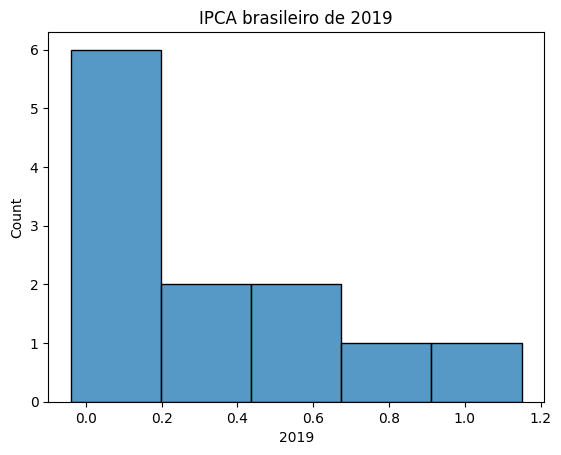

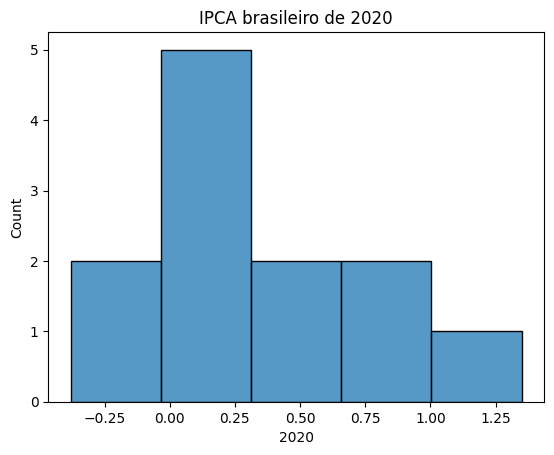

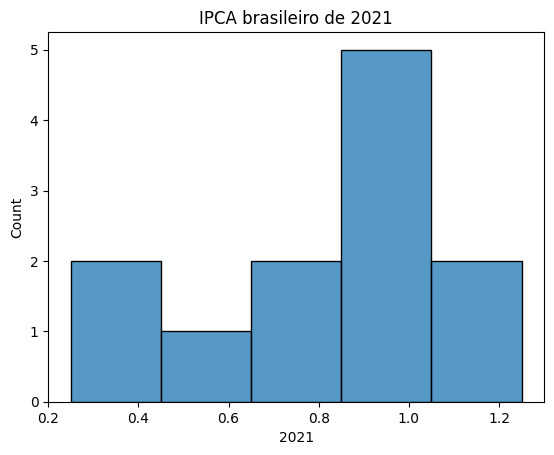

In [6]:
#Histogramas dos dados de IPCA por ano
for cln in dataIpcaMedio:
    if cln == "Mes": continue
    histIpca = sb.histplot(dataIpcaMedio, x=cln).set_title(f"IPCA brasileiro de {cln}")
    plt.show()

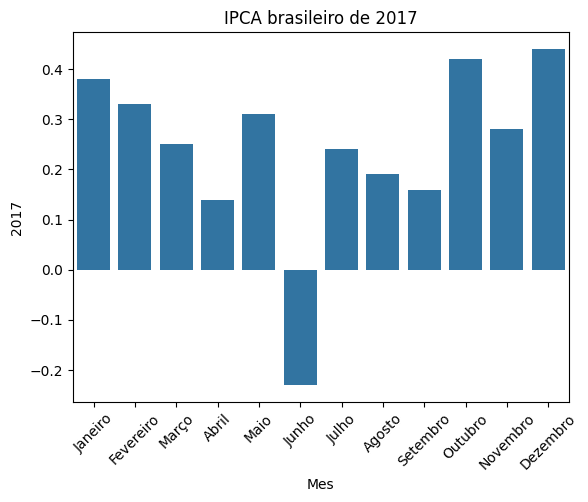

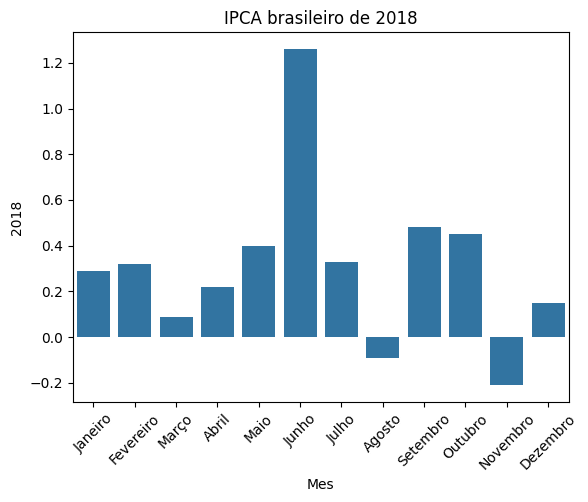

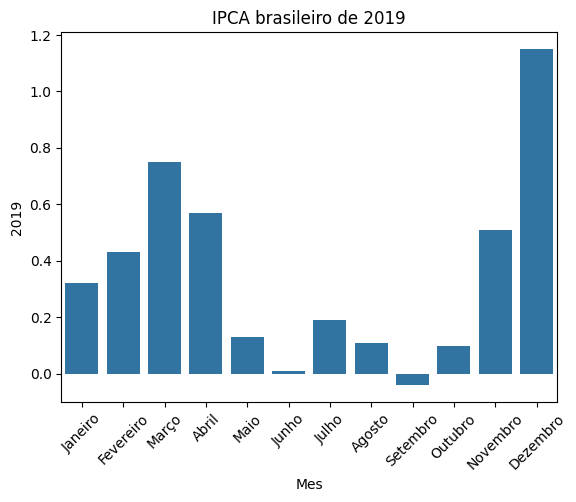

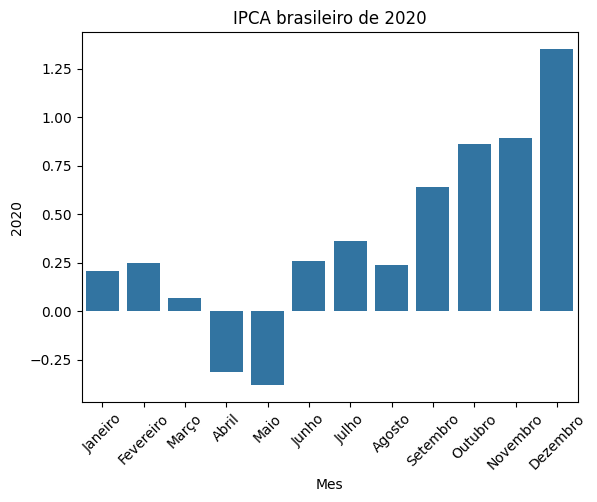

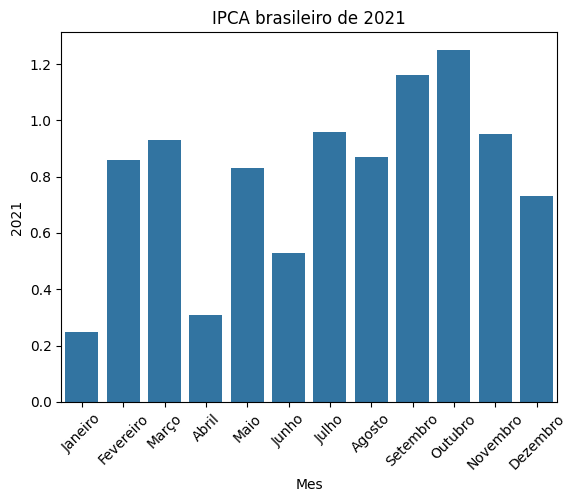

In [33]:
#Gráficos de barra dos dados de IPCA por mês ao longo dos anos entre 2017 e 2021
for cln in dataIpcaMedio:
    if cln == "Mes": continue
    histIpca = sb.barplot(dataIpcaMedio, x='Mes', y=cln).set_title(f"IPCA brasileiro de {cln}")
    plt.xticks(rotation=45)
    plt.show()